In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn

## data preprocessing

In [2]:
cd ..

C:\Users\kesav\OneDrive\Desktop\AI\dl\Long-term-traffic-flow-forecasting-using-a-hybrid-CNN-BiLSTM-model


In [3]:
df=pd.read_csv("Datasets/AS2(t-12).csv")
data=df["clave"]
df.drop(columns=["clave"],axis=1,inplace=True)
df['hour(t)']=list(np.arange(13,24))+list(np.arange(0,24))*1307
df=df.reindex(columns=['var1(t-12)','var2(t-12)','var3(t-12)','var4(t-12)','var5(t-12)','var6(t-12)','var7(t-12)','var8(t-12)','hour(t)','obj'])

print(df)
print(data)

       var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31374         261       260.0       114.0       218.0         0.0       170.0   
31375         395       420.0       170.0       218.0         0.0       170.0   
31376         459       590.0       228.0       218.0         0.0       170.0   
31377         631       696.0       305.0       218.0         0.0       170.0   
31378         743       852.0       353.0       218.0         0.0       170.0   

       var7(t-12) var8(t-12

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['var8(t-12)']=le.fit_transform(df['var8(t-12)'])
# le.transform(df['var8(t-12)'])
print(df)

       var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31374         261       260.0       114.0       218.0         0.0       170.0   
31375         395       420.0       170.0       218.0         0.0       170.0   
31376         459       590.0       228.0       218.0         0.0       170.0   
31377         631       696.0       305.0       218.0         0.0       170.0   
31378         743       852.0       353.0       218.0         0.0       170.0   

       var7(t-12)  var8(t-1

In [5]:
def slicing_data(data,rows):
    x=list()
    y=list()
    for i in np.arange(rows-1,len(data)):
        y.append(data.iloc[i][-1])
        x.append([data.iloc[i-3][:-1],data.iloc[i-2][:-1],data.iloc[i-1][:-1],data.iloc[i][:-1]])
    
    return np.array(x).astype('float32'),np.array(y).astype('float32')


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split


In [7]:

scaler=MinMaxScaler()
df[df.columns.difference(['obj'])]=scaler.fit_transform(df[df.columns.difference(['obj'])])

In [8]:
x,y=slicing_data(df,4)
print(x)
print(y)

[[[0.08009199 0.33433804 0.22783934 ... 0.27970296 0.33333334 0.5652174 ]
  [0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]]

 [[0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]]

 [[0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]
  [0.05339466 0.0839323  0.04466759 ... 0.27970296 0.33333334 0.7826087 ]]

 ...

 [[0.02489751 0.03825643 0.02285319 ... 0.64851487 1.         0.7826087 ]
  [0.02629737 0.06028287 0

In [9]:
print(x[0].shape)
print(y.shape)

(4, 9)
(31376,)


In [10]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.333,random_state=101)

In [11]:
 y_test.shape

(10449,)

# model training

In [12]:
import tensorflow.keras.layers as layers

In [13]:
input_layer=layers.Input(shape=(4,9,1))
layer_1=layers.TimeDistributed(layers.Conv1D(filters=512,kernel_size=2,activation="relu"))(input_layer)
layer_2=layers.TimeDistributed(layers.MaxPool1D(pool_size=2, padding='same'))(layer_1)
layer_3=layers.TimeDistributed(layers.Flatten())(layer_2)
layer_4=layers.Dropout(0.5)(layer_3)
layer_5=layers.Bidirectional(layers.LSTM(512, activation = 'relu'))(layer_4)
layer_6=layers.BatchNormalization()(layer_5)
output_layer=layers.Dense(1)(layer_6)
model_1=tf.keras.Model(inputs=input_layer,outputs=output_layer)


In [14]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 9, 1)]         0         
                                                                 
 time_distributed (TimeDist  (None, 4, 8, 512)         1536      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 4, 4, 512)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 4, 2048)           0         
 stributed)                                                      
                                                                 
 dropout (Dropout)           (None, 4, 2048)           0         
                                                             

In [15]:
model_1.compile(optimizer='adam',loss='mse',metrics=[tf.keras.metrics.MeanAbsoluteError()])
history_1=model_1.fit(X_train,y_train,epochs=100,batch_size = 32, shuffle=True,validation_data=(X_test,y_test))

Epoch 1/100
654/654 [==============================] - 232s 349ms/step - loss: 147720.5469 - mean_absolute_error: 295.5291 - val_loss: 46548.6172 - val_mean_absolute_error: 168.7746
Epoch 2/100
654/654 [==============================] - 203s 310ms/step - loss: 41605.7539 - mean_absolute_error: 144.7225 - val_loss: 48067.9844 - val_mean_absolute_error: 160.4821
Epoch 3/100
654/654 [==============================] - 197s 301ms/step - loss: 36950.8984 - mean_absolute_error: 135.5106 - val_loss: 26176.8789 - val_mean_absolute_error: 105.1050
Epoch 4/100
654/654 [==============================] - 198s 303ms/step - loss: 34888.8828 - mean_absolute_error: 131.0171 - val_loss: 27859.7598 - val_mean_absolute_error: 108.4899
Epoch 5/100
654/654 [==============================] - 193s 295ms/step - loss: 32893.1953 - mean_absolute_error: 125.9100 - val_loss: 25992.0059 - val_mean_absolute_error: 114.1794
Epoch 6/100
654/654 [==============================] - 193s 295ms/step - loss: 32203.0469 - me

# model evaluation

In [16]:
model_1.save('model_12.h5')

C:\Users\kesav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
from tensorflow.keras.models import load_model

In [18]:

savedModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 9, 1)]         0         
                                                                 
 time_distributed (TimeDist  (None, 4, 8, 512)         1536      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 4, 4, 512)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 4, 2048)           0         
 stributed)                                                      
                                                                 
 dropout (Dropout)           (None, 4, 2048)           0         
                                                             

In [16]:
savedModel=load_model('model_12.h5')

In [17]:
pred=savedModel.predict(X_test)
pred

327/327 [==============================] - 12s 36ms/step


array([[ 34.157825],
       [ 25.100216],
       [313.311   ],
       ...,
       [227.22293 ],
       [400.66428 ],
       [931.395   ]], dtype=float32)

In [18]:
pred=pred.reshape(pred.shape[0])
y_test=y_test.reshape(y_test.shape[0])

In [19]:
MAE = sklearn.metrics.mean_absolute_error(pred,y_test)
print(MAE)

63.64144


In [20]:
import random

In [21]:

rand=random.randint(0,30000)
rand

14735

In [22]:
y1=y[rand:rand+500]
x1=savedModel.predict(x[rand:rand+500])


16/16 [==============================] - 1s 33ms/step


In [23]:
x1=x1.reshape(x1.shape[0])
x1

array([ 325.51895 ,  395.21158 ,  454.59464 ,  513.0357  ,  531.79706 ,
        476.16718 ,  377.76636 ,  270.77704 ,  258.74216 ,  197.65561 ,
        110.268456,   76.64628 ,   59.342106,   55.34192 ,   66.90734 ,
         77.10032 ,  110.46702 ,  182.90091 ,  260.4775  ,  395.8432  ,
        442.2902  ,  520.21106 ,  437.1954  ,  270.48322 ,  311.37292 ,
        373.20303 ,  416.34457 ,  445.79898 ,  476.61316 ,  405.56833 ,
        294.03683 ,  212.19615 ,  146.63324 ,   70.41517 ,   34.398285,
         22.002493,   22.472506,   49.320515,  162.12268 ,  588.58594 ,
        903.00543 , 1050.3853  ,  939.5548  ,  825.3174  ,  767.007   ,
        799.22766 ,  819.29565 ,  823.12286 ,  790.96735 ,  775.48755 ,
        884.26    ,  929.3854  ,  677.0156  ,  493.88953 ,  345.61002 ,
        247.23688 ,  168.97281 ,   80.08062 ,   50.51192 ,   31.362963,
         25.54252 ,   51.60963 ,  175.32233 ,  648.65564 , 1048.0509  ,
        823.6903  ,  717.03925 ,  749.9418  ,  715.6212  ,  651.

In [24]:
import matplotlib.pylab as plt

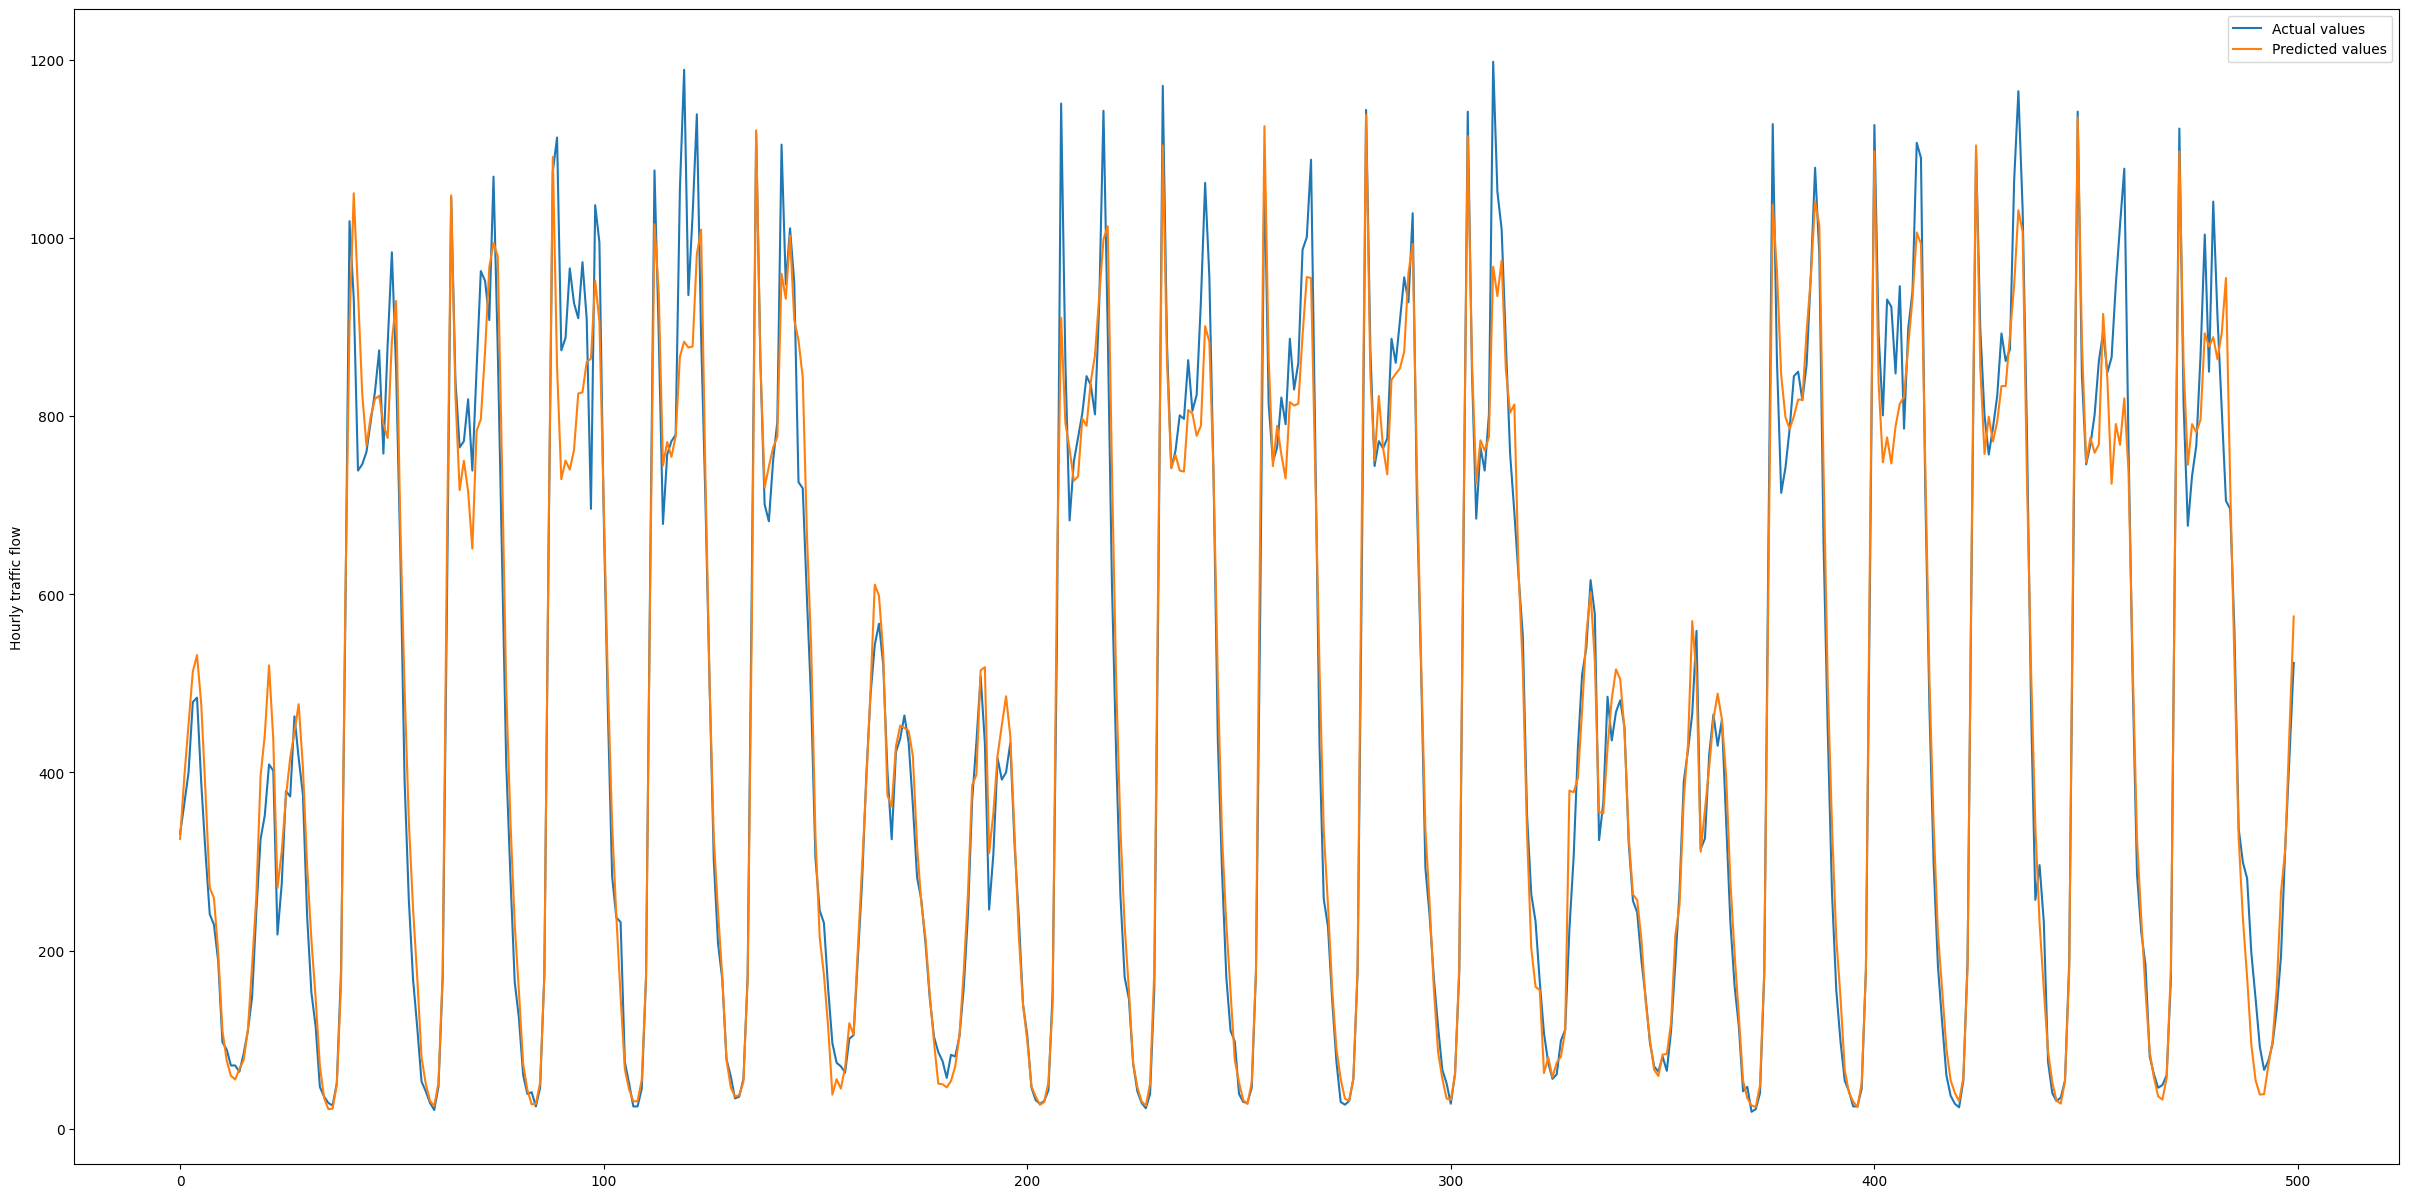

In [25]:
plt.figure(figsize=(30, 15))
plt.plot(y1, label = "Actual values")
plt.plot(x1, label = "Predicted values")
plt.legend()
plt.ylabel('Hourly traffic flow')
plt.show()